# Random Forest

Un Random Forest est un ensemble de $B$ arbres de décision, chacun entraîné sur une sous-partie différente du jeu de données et avec un sous-ensemble aléatoire de variables à chaque nœud.

À cet effet, il combine plusieurs arbres pour réduire la variance du modèle et améliorer sa généralisation.

Un arbre seul a un faible bias, mais une grande variance.
L'algorithme du Random Forest réduit la variance sans augmenter le bias, ceci grâce à l'agrégation d'estimateurs non-corrélés.
Il s'agit d'une technique de *bagging*.

## Formulation mathématique

Soient $\mathcal{D}=\big\{(x_i,y_i):\quad x_i\in\mathbb{R}^d \quad\text{et}\quad y_i\in\mathcal{C}\big\}_{i=1}^n $ un jeu de données classifié et $B$ un nombre d'arbres à construire.

### Étape 1: Bootstrap

Pour chaque arbre $b=1,\ldots,B$:

- Nous tirons un échantillon aléatoire avec remise $\mathcal{D}^{(b)}\subseteq\mathcal{D}$ (méthode du bootstrap)
- Ce jeu de données est utilis&é pour entrainer l'arbre correspondant, noté $T_b$.

### Étape 2: Construction de chacun des arbres

Lors de la construction de chaque arbre, nous procédons comme il suit,

- À chaque nœud, nous ne considérons qu'un sous-ensemble aléatoire de $m$ caractéristiques parmi les $d$ disponibles (en général $m<<d$.)
- Puis nous sélectionnons la meilleur division sur ce sous-ensemble en utilisant un critère (Gini, entropie, etc.)

Cela dans le but d'introduire de la diversité entre les arbres, et ce qui dans un même temps diminue leurs corrélations.

## Prédiction

### Classification

Dans la cas d'usage du Random Forest pour une classification, la prédiction est donnée par le vote majoritaire des arbres:

$$\hat{y} = \arg\max_{c\in\mathcal{C}} \sum_{b=1}^B \mathbb{1}_{\{T_b(x)=c\}} $$

La variance de la moyenne du modèle est approchée de la manière suivante:

$$\mathrm{Var}_\text{RF} \sim \rho\cdot\sigma^2 + \dfrac{1-\rho}{B}\cdot\sigma^2$$

Théoriquement lorsque $B\rightarrow\infty$, la variance tend vers $\rho\cdot{}\sigma^2$, d'où l'intérêt de diminuer $\rho$ avec la randomisation.

### Régression

Dans le cas d'une régression, nous prédisons sur le moyenne des prédicitions de chaque arbre:

$$ \hat{y} = \dfrac{1}{B}\sum_{b=1}^B T_b(x) $$





Accuracy: 1.00


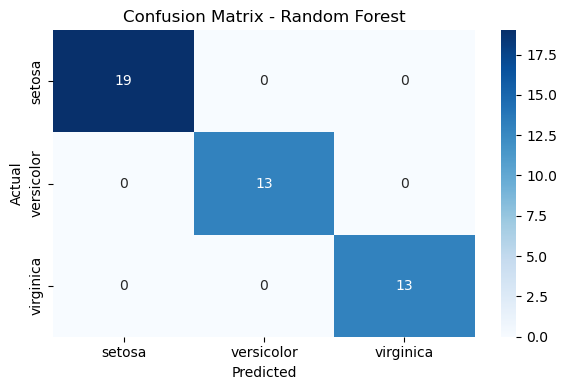

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
